## Import

In [9]:
import pandas as pd
from utils import import_df
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE, ADASYN
import matplotlib.pyplot as plt
from utils import export_df

df = import_df("1-data-cleaning-output.json")
df

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current,label
3050,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956,working-engine-1
3051,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103,working-engine-1
3052,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103,working-engine-1
3053,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632,working-engine-1
3056,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089,working-engine-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24387,0.117213,-0.862416,0.121430,-0.251412,0.460662,0.298635,0.257918,-0.307911,-0.360434,-0.153353,...,1.904471,1.017857,1.000000,1.000000,1.000000,1.044533,1.012060,1.068273,3.955596,magnet-1
24388,0.298033,-1.253810,-0.661358,-0.743516,0.405729,0.834227,0.328872,-0.614617,-0.470299,-0.640879,...,1.855294,0.942460,1.000000,1.000000,1.000000,1.035951,0.868844,0.839357,3.950561,magnet-1
24389,0.265989,-0.500777,-0.182988,-0.475720,0.023491,0.944092,0.580646,0.033128,-1.392707,0.217441,...,1.828471,0.980159,1.000000,1.000000,1.000000,1.038475,1.040704,1.098795,3.948730,magnet-1
24390,0.588717,-0.388623,0.677621,-0.342967,0.291287,-0.046982,0.688222,-0.101914,-0.271169,-0.199130,...,2.011765,0.942460,1.000000,1.000000,1.000000,0.978903,0.887940,1.236145,3.959258,magnet-1


## Data genaration

In [2]:
for label in df.label.unique():
    print(len(df[df.label == label]))
df_base = df.copy()

782
321
1220
287
3821
3769


In [3]:
X = df.drop(["label"], axis=1)
y = df.label
X_resampled, y_resampled = SMOTE().fit_resample(X, y)
X_resampled

,s_00,s_01,s_02,s_03,s_04,s_05,s_06,s_07,s_08,s_09,...,vib_y_peak,vib_y_vel,vib_z_acc,vib_z_f1,vib_z_f2,vib_z_f3,vib_z_kurt,vib_z_peak,vib_z_vel,current
0,-0.068780,-4.477798,-6.905241,-4.547951,-2.283589,-0.124857,-1.274090,-0.499428,-1.128634,-0.117876,...,0.685517,2.844896,1.684042,1.109990,2.106870,0.603318,0.362336,0.576215,2.100146,3.967956
1,0.368391,-5.471160,-5.840925,-3.531701,-1.571756,-1.326505,-1.415999,0.166629,-0.261158,-0.461204,...,0.740439,2.838546,1.700080,4.016145,6.259542,4.072398,0.352717,0.611753,2.122022,3.950103
2,0.063973,-5.670291,-6.273518,-3.701076,-2.121080,-0.683337,-1.354200,-0.224765,-0.041428,-0.458915,...,0.724166,2.835371,1.668003,7.346115,10.625954,4.796380,0.353037,0.573677,2.068546,3.950103
3,-0.116846,-5.862554,-6.252918,-3.568322,-2.457542,-0.948844,-0.878119,-0.618448,0.189746,0.184253,...,0.756713,2.863947,1.684042,5.206862,7.816794,4.404223,0.358809,0.581292,2.100146,3.960632
4,-0.380064,-5.342985,-6.486381,-3.854429,-2.130236,-1.038109,-0.688144,0.228428,-0.586175,-0.323873,...,0.752644,2.848071,1.684042,4.278507,6.473282,3.469080,0.353679,0.596522,2.102577,3.961089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22921,0.840141,3.178285,0.206806,0.410460,-0.095266,-0.520097,0.466082,-0.250656,-0.018716,-0.010328,...,1.131208,1.095294,1.017857,1.000000,1.000000,1.000000,0.980893,1.062585,1.200000,3.941263
22922,0.507435,3.045574,0.894889,0.110323,-0.246533,0.103792,0.430000,-0.329811,-0.621114,0.245524,...,1.124387,1.106924,1.017857,1.000000,1.000000,1.000000,0.997650,0.990264,1.058348,3.938117
22923,0.529684,2.633864,0.843395,0.066456,-0.518330,0.171164,0.072843,-0.663514,-0.048494,0.093382,...,0.990247,1.071069,1.005452,1.000000,1.000000,1.000000,1.012838,1.006267,1.243124,3.942008
22924,-0.598303,1.480482,0.966491,-0.066773,0.083303,-0.187821,0.189017,0.075339,0.036094,0.633077,...,1.053459,0.951995,1.030787,1.000000,1.000000,1.000000,1.021898,1.218245,1.194713,3.942177


In [4]:
df = X_resampled
df["label"] = y_resampled

In [5]:
for label in X_resampled.label.unique():
    print(len(df[df.label == label]))

3821
3821
3821
3821
3821
3821


## Export

In [10]:
export_df(df, "2-data-generation-output.json")

## Visualize

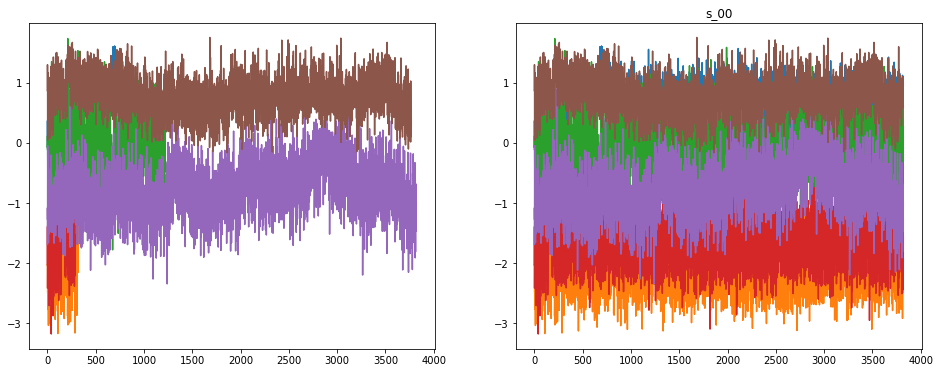

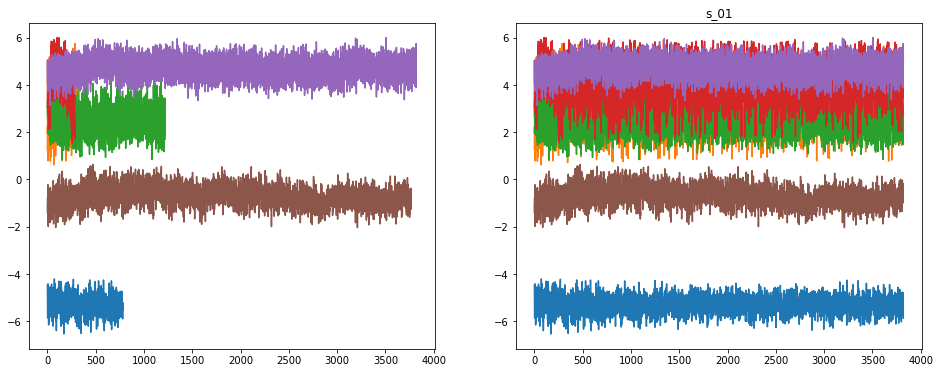

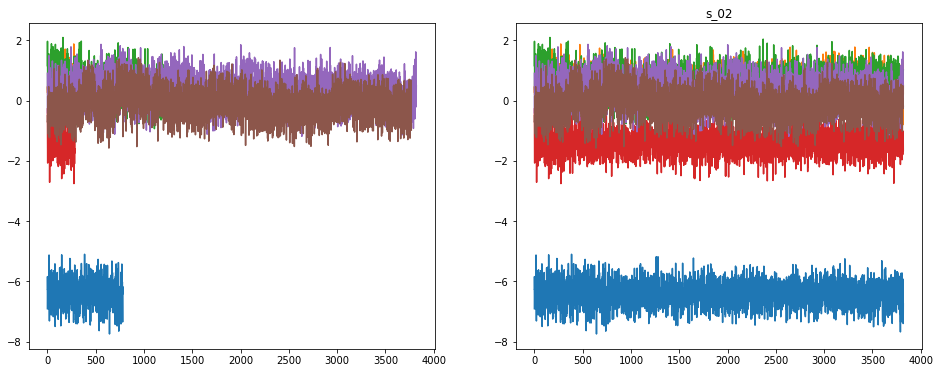

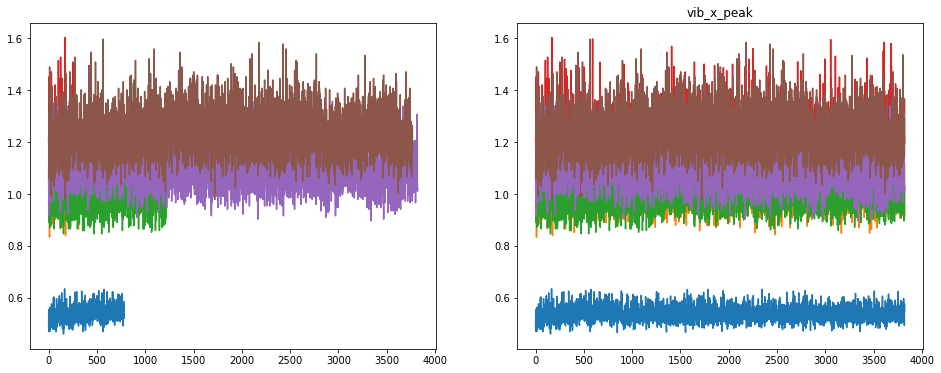

In [7]:
for col in ['s_00', 's_01', 's_02', 'vib_x_peak']:
    fig, (ax1, ax2) = plt.subplots(1,2)
    for label in df.label.unique():
        dff = df[df.label == label][col].reset_index()
        ax2.plot(dff[col], label=label)
        dff = df_base[df_base.label == label][col].reset_index()
        ax1.plot(dff[col], label=label)
    fig.set_size_inches(16, 6)
    plt.title(col)
    plt.show()

## Data visulization

In [8]:
import umap
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

df_dr = df.drop(["label"], axis=1)
reducer = PCA()
embedding= reducer.fit_transform(df_dr)
c=[sns.color_palette()[x] for x in pd.factorize(df.label)[0]]

In [9]:
df_dr = df_base.drop(["label"], axis=1)
reducer = PCA()
embedding_base= reducer.fit_transform(df_dr)
c_base=[sns.color_palette()[x] for x in pd.factorize(df_base.label)[0]]

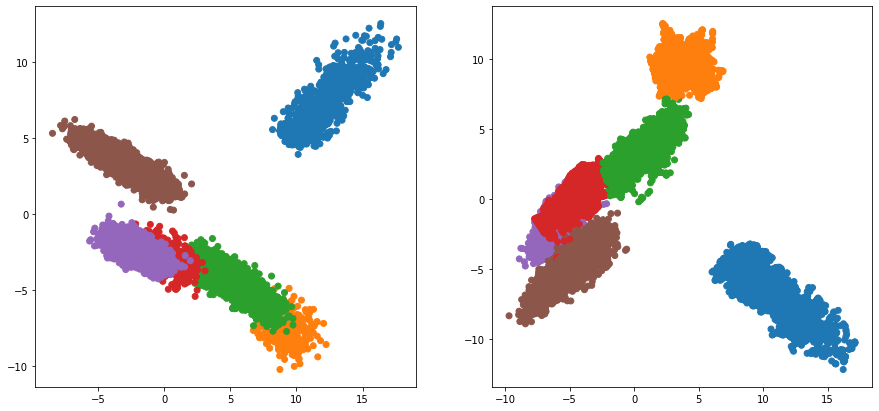

In [10]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))
ax1.scatter(embedding_base[:, 0], embedding_base[:, 1], c=c_base)
ax2.scatter(embedding[:, 0], embedding[:, 1], c=c)
plt.show()